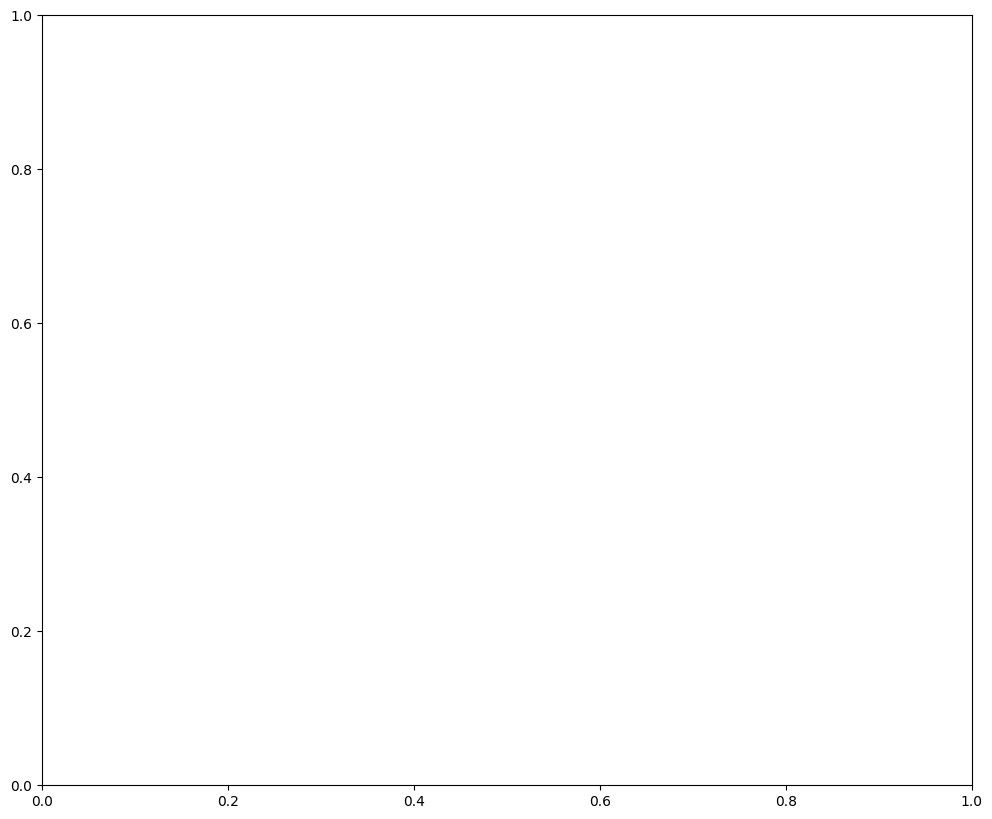

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. 나스닥 주요 20개 종목
tickers = [
    "AAPL", "MSFT", "TSLA", "NVDA", "GOOGL", "META", "AMZN", "NFLX", "INTC", "AMD",
    "ADBE", "CSCO", "PYPL", "QCOM", "ORCL", "TXN", "ZM", "SNOW", "CRM", "SHOP"
]

# 2. 데이터 수집
data = {ticker: yf.Ticker(ticker).history(period="1mo", interval="1d") for ticker in tickers}

# 3. OBV 계산 함수
def calculate_obv(hist):
    obv = [0]
    for i in range(1, len(hist)):
        if hist["Close"].iloc[i] > hist["Close"].iloc[i - 1]:
            obv.append(obv[-1] + hist["Volume"].iloc[i])
        elif hist["Close"].iloc[i] < hist["Close"].iloc[i - 1]:
            obv.append(obv[-1] - hist["Volume"].iloc[i])
        else:
            obv.append(obv[-1])
    return obv

# 4. 데이터 전처리
df_list = []
for ticker, hist in data.items():
    if not hist.empty:
        hist["Ticker"] = ticker
        hist["OBV"] = calculate_obv(hist)
        hist["Date"] = hist.index
        df_list.append(hist)

# 5. 빈 데이터 처리
if not df_list:
    print("데이터를 가져오지 못했습니다. 샘플 데이터를 사용합니다.")
    df = pd.DataFrame({
        "Date": pd.date_range(start="2023-01-01", periods=10, freq="D"),
        "Volume": [1000 + i * 10 for i in range(10)],
        "OBV": [i * 100 for i in range(10)],
        "Ticker": ["Sample"] * 10
    })
else:
    df = pd.concat(df_list)

# 6. 사각형 대형 배치
positions = [(x, y) for x in range(5) for y in range(4)]
ticker_positions = dict(zip(tickers, positions))

# 7. 애니메이션 설정
fig, ax = plt.subplots(figsize=(12, 10))

def init():
    ax.clear()
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(4))
    ax.set_xlabel("X 위치")
    ax.set_ylabel("Y 위치")
    ax.set_title("나스닥 주요 종목 OBV 변화 애니메이션")
    return ax

def update(frame):
    ax.clear()
    current_date = frame
    current_data = df[df["Date"] == current_date]
    for ticker, group in current_data.groupby("Ticker"):
        if ticker in ticker_positions:
            x, y = ticker_positions[ticker]
            obv = group["OBV"].iloc[-1] / 1e6  # OBV 크기 조정
            ax.scatter(x, y, s=obv + 50, label=ticker, alpha=0.7)
            ax.text(x, y, ticker, ha="center", va="center", fontsize=8, color="black")
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(4))
    ax.set_xlabel("X 위치")
    ax.set_ylabel("Y 위치")
    ax.set_title(f"OBV 변화: {current_date.date()}")
    return ax

# 8. 프레임 생성 및 애니메이션 실행
dates = sorted(df["Date"].unique())
ani = FuncAnimation(fig, update, frames=dates, init_func=init, repeat=False, interval=3000)  # 한 프레임당 3초
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. 나스닥 주요 20개 종목
tickers = [
    "AAPL", "MSFT", "TSLA", "NVDA", "GOOGL", "META", "AMZN", "NFLX", "INTC", "AMD",
    "ADBE", "CSCO", "PYPL", "QCOM", "ORCL", "TXN", "ZM", "SNOW", "CRM", "SHOP"
]

# 2. 데이터 수집
data = {ticker: yf.Ticker(ticker).history(period="1mo", interval="1d") for ticker in tickers}

# 데이터 확인
for ticker, hist in data.items():
    if hist.empty:
        print(f"데이터가 비어 있습니다: {ticker}")

# 3. OBV 계산 함수
def calculate_obv(hist):
    obv = [0]
    for i in range(1, len(hist)):
        if hist["Close"].iloc[i] > hist["Close"].iloc[i - 1]:
            obv.append(obv[-1] + hist["Volume"].iloc[i])
        elif hist["Close"].iloc[i] < hist["Close"].iloc[i - 1]:
            obv.append(obv[-1] - hist["Volume"].iloc[i])
        else:
            obv.append(obv[-1])
    return obv

# 4. 데이터 전처리
df_list = []
for ticker, hist in data.items():
    if not hist.empty:
        hist["Ticker"] = ticker
        hist["OBV"] = calculate_obv(hist)
        hist["Date"] = hist.index
        df_list.append(hist)

# 5. 빈 데이터 처리
if not df_list:
    print("데이터를 가져오지 못했습니다. 샘플 데이터를 사용합니다.")
    df = pd.DataFrame({
        "Date": pd.date_range(start="2023-01-01", periods=10, freq="D"),
        "Volume": [1000 + i * 10 for i in range(10)],
        "OBV": [i * 100 for i in range(10)],
        "Ticker": ["Sample"] * 10
    })
else:
    df = pd.concat(df_list)

# 6. 사각형 대형 배치
positions = [(x, y) for x in range(5) for y in range(4)]
ticker_positions = dict(zip(tickers, positions))

# 7. 애니메이션 설정
fig, ax = plt.subplots(figsize=(12, 10))

def init():
    ax.clear()
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(4))
    ax.set_xlabel("X 위치")
    ax.set_ylabel("Y 위치")
    ax.set_title("나스닥 주요 종목 OBV 변화 애니메이션")
    return ax

def update(frame):
    ax.clear()
    current_date = frame
    current_data = df[df["Date"] == current_date]
    for ticker, group in current_data.groupby("Ticker"):
        if ticker in ticker_positions:
            x, y = ticker_positions[ticker]
            obv = group["OBV"].iloc[-1] / 1e6  # OBV 크기 조정
            ax.scatter(x, y, s=obv + 50, label=ticker, alpha=0.7)
            ax.text(x, y, ticker, ha="center", va="center", fontsize=8, color="black")
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(4))
    ax.set_xlabel("X 위치")
    ax.set_ylabel("Y 위치")
    ax.set_title(f"OBV 변화: {current_date.date()}")
    return ax

# 8. 프레임 생성 및 애니메이션 생성
dates = sorted(df["Date"].unique())
ani = FuncAnimation(fig, update, frames=dates, init_func=init, repeat=False, interval=3000)

# 9. 애니메이션 저장
ani.save("nasdaq_obv_animation.mp4", fps=10, extra_args=['-vcodec', 'libx264'])
print("애니메이션이 MP4 파일로 저장되었습니다: nasdaq_obv_animation.mp4")


<ipython-input-23-29ba4283bd62>:95: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  ani.save("nasdaq_obv_animation.mp4", fps=10, extra_args=['-vcodec', 'libx264'])
<ipython-input-23-29ba4283bd62>:95: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  ani.save("nasdaq_obv_animation.mp4", fps=10, extra_args=['-vcodec', 'libx264'])
<ipython-input-23-29ba4283bd62>:95: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  ani.save("nasdaq_obv_animation.mp4", fps=10, extra_args=['-vcodec', 'libx264'])
<ipython-input-23-29ba4283bd62>:95: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  ani.save("nasdaq_obv_animation.mp4", fps=10, extra_args=['-vcodec', 'libx264'])
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
<ipython-input-23-29ba4283bd62>:95: 

ValueError: need at least one array to concatenate

ValueError: need at least one array to concatenate

<Figure size 1200x1000 with 1 Axes>